# Skater

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("../")

In [3]:
from spopt.region.skater import Skater
import geopandas as gpd
import libpysal
from libpysal.examples import load_example
import numpy as np
from sklearn.metrics import pairwise as skm

##### Airbnb Spots Clustering in Chicago

Cluster 77 communities into 10 regions such that each region consists of at least 3 communities and homogeneity in the number of Airbnb spots in communities is maximized.

In [4]:
load_example('AirBnB')

<AxesSubplot:>

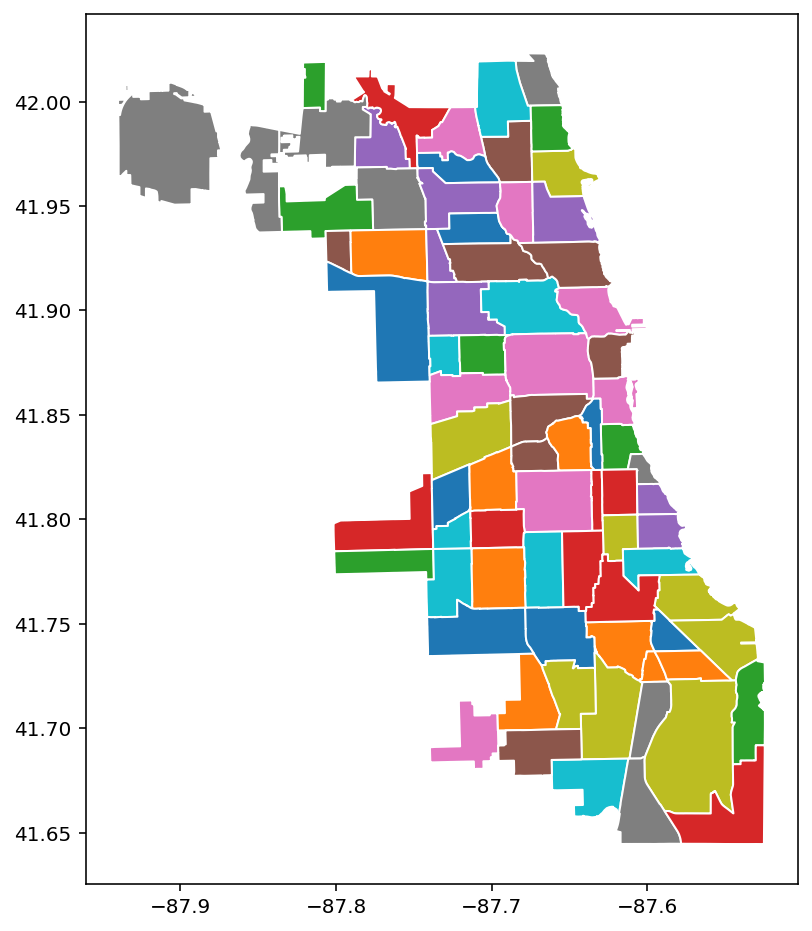

In [5]:
pth = libpysal.examples.get_path('airbnb_Chicago 2015.shp')
chicago = gpd.read_file(pth)
chicago.plot(column='community', categorical=True, figsize=(12,8), edgecolor='w')

Initialize the parameters

In [6]:
w = libpysal.weights.Queen.from_dataframe(chicago)
attrs_name = ['num_spots']
n_clusters = 10
floor = 3
trace = False
islands = "increase"
spanning_forest_kwds = dict(
    dissimilarity=skm.manhattan_distances, affinity=None, reduction=np.sum, center=np.mean
)

In [7]:
model = Skater(chicago, w, attrs_name, n_clusters, floor, trace, islands, spanning_forest_kwds)
model.solve()
chicago['skater_new'] = model.labels_

<AxesSubplot:>

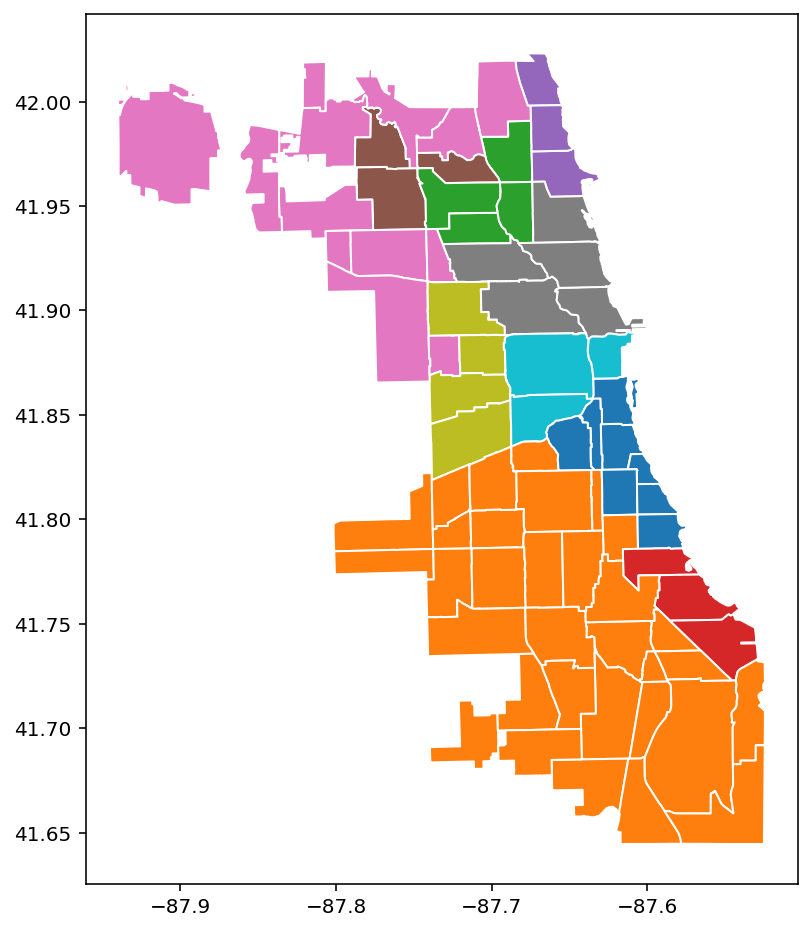

In [8]:
chicago.plot(column='skater_new', categorical=True, figsize=(12,8), edgecolor='w')